In [23]:
import pandas as pd
from matplotlib import pyplot as plt

In [24]:
df_w = pd.read_csv("all_ticks_wide.csv")
df_l = pd.read_csv("all_ticks_long.csv")
df_w["timestamp"] = pd.to_datetime(df_w["timestamp"])
df_w = df_w.sort_values(by="timestamp")

We created the function Is_Null() which takes a dataframe as input, then returns "True" if the dataframe has null values, "False" otherwise. 

In [25]:
def Is_Null(df):
    if df.isnull().astype(int).iloc[:,1].sum() > 0:
        return True
    else:
        return False

Then, we created another function Find_Outliers() which takes a dataframe and returns the outliers if the dataframe doesn't have any null values.

In [26]:
def Find_Outliers(df):
        mean = df.iloc[:,1].mean()
        std = df.iloc[:,1].std()
        upper_limit = mean + 3*std
        lower_limit = mean - 3*std
        smaller_outliers = df[df.iloc[:,1] < lower_limit]
        larger_outliers = df[df.iloc[:,1] > upper_limit]
        outliers = {"smaller_outliers" : smaller_outliers, "larger_outliers" : larger_outliers }
        
        return outliers

Lastly, we created the function df_Monthly() which takes a dataframe and a key indicating the year and the month key = (year,month), and returns a new dataframe consisting of the values in the original dataframe in that certain month of the year.

In [27]:
def df_Monthly(df, key):
    df_Monthly_dictionary = {}
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df_yearly = df["timestamp"].dt.year
    for i in range(2012,2020):
        df_current_year = df.loc[df_yearly == i]
        df_current_year_monthly = df_current_year["timestamp"].dt.month
        for k in range(1,13):
             df_Monthly_dictionary[i,k] = df_current_year.loc[df_current_year_monthly == k]
    
    return df_Monthly_dictionary.get(key)

In [29]:
def Func(df,column_name,key):
    df_column = df.loc[:,["timestamp",column_name]]
    df_column_without_null = df_column.interpolate()
    df_column_monthly = df_Monthly(df_column_without_null, key)
    return Find_Outliers(df_column_monthly)

#print(Func(df_w,column_name = "CEMAS", key = (2017,2)))

for year in range(2017,2019):
     for month in range(1,13):
       print(Func(df_w,column_name = "FROTO", key = (year,month)))

{'smaller_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: [], 'larger_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: []}
{'smaller_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: [], 'larger_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: []}
{'smaller_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: [], 'larger_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: []}
{'smaller_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: [], 'larger_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: []}
{'smaller_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: [], 'larger_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: []}
{'smaller_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: [], 'larger_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: []}
{'smaller_outliers': Empty DataFrame
Columns: [timestamp, FROTO]
Index: [], 'larger_outliers': Empty

C:\Users\EylülRanaSaraç\AppData\Local\Temp\ipykernel_5620\1047857941.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(df_column_monthly["timestamp"], df_column_monthly[column_name],marker = "None", linestyle = "solid")


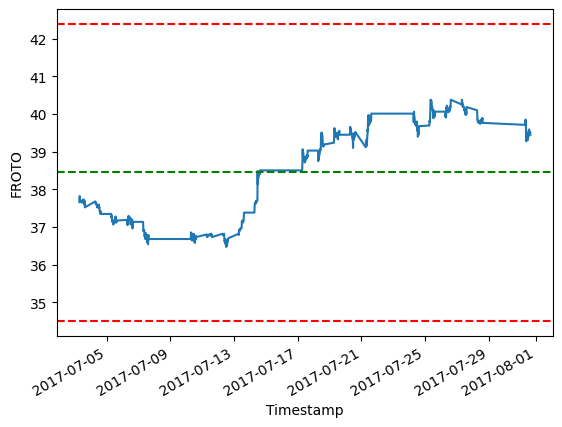

In [31]:
def Draw_Graph(df,column_name,key):
    df_column = df.loc[:,["timestamp",column_name]]
    df_column_without_null = df_column.interpolate()
    df_column_monthly = df_Monthly(df_column_without_null, key)
    plt.plot_date(df_column_monthly["timestamp"], df_column_monthly[column_name],marker = "None", linestyle = "solid")
    plt.gcf().autofmt_xdate()
    plt.axhline(y = df_column_monthly[column_name].mean(), color = 'g', linestyle = '--')
    plt.axhline(y = df_column_monthly[column_name].mean() + 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
    plt.axhline(y = df_column_monthly[column_name].mean() - 3*df_column_monthly[column_name].std(), color = 'r', linestyle = '--')
    plt.xlabel("Timestamp")
    plt.ylabel(column_name)
    save_path = "FROTO SP" # Hisseye göre farklı klasör seç
    save_name = f"{column_name} {key[0]}-{key[1]}"
    plt.savefig(f"{save_path}/{save_name}.png", format='png')

Draw_Graph(df_w,column_name = "FROTO", key = (2017,7)) # Hisse ismi, yıl ve ay gir